In [8]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.4/38.8 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.5/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.9/38.8 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.8 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.6/38.8 MB 4.9 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.8 MB 5.6 MB/s eta 0:00:07
   -- -----------------

In [3]:
# Import main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

%matplotlib inline

## Data preprocessing

In [40]:
image = cv2.imread('digits1.png')

# Get the shape of the image
height, width, channels = image.shape

# Print the dimensions
print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 1000, Width: 2000, Channels: 3


(-0.5, 1999.5, 999.5, -0.5)

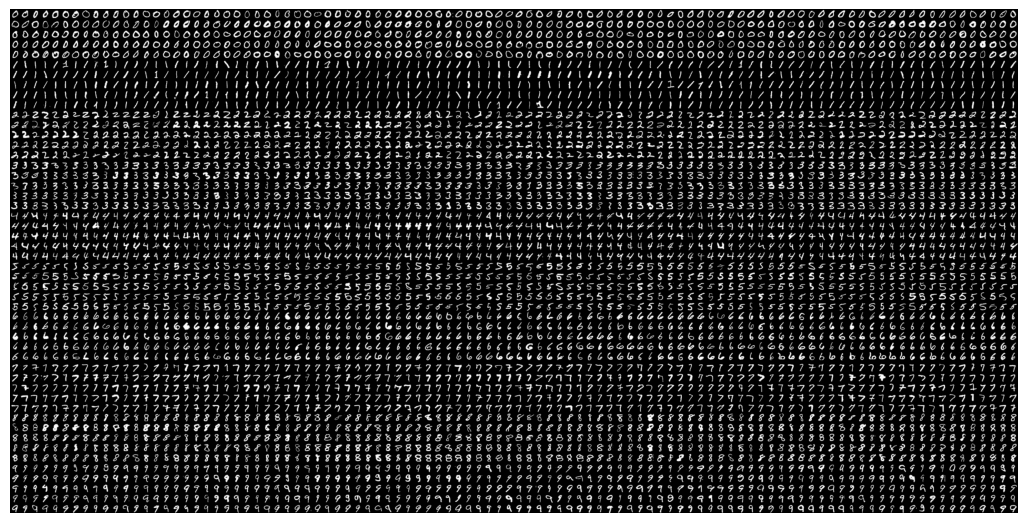

In [38]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Transform the image to RGB

# Visualising the image
plt.figure(figsize = (13, 10))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes

#### As we can see, the image has 5000 handwritten digits (numbers). There are 500 samples of each digit. First, we will convert the image to gray scale

(-0.5, 1999.5, 999.5, -0.5)

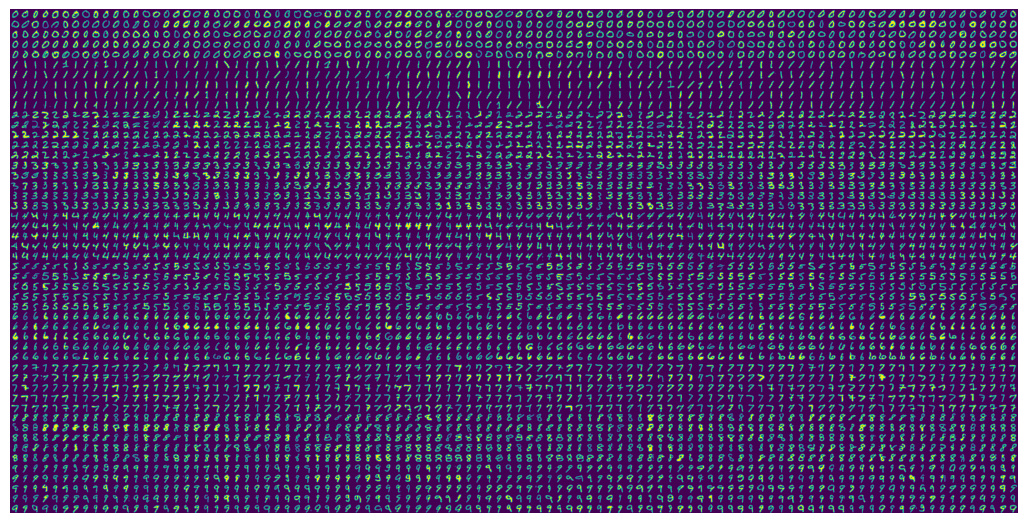

In [29]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Visualising the image
plt.figure(figsize = (13, 10))
plt.imshow(image_gray)
plt.axis("off")  # Hide axes

#### We will divide the image into 5000 small samples of 20x20

#### - np.vsplit(image_gray, 50): vertically splits the image into 50 equal horizontal strips, with each strip 20 pixels tall
#### - np.hsplit(i, 100): for each of the 50 horizontal strips (i), this splits the strip into 100 vertical sections, with each section 20 pixels wide

In [46]:
divisions = list(np.hsplit(i, 100) for i in np.vsplit(image_gray, 50))

#### Now we want to transform the divisions into Numpy arrays of size (50, 100, 20, 20)

In [49]:
div_array = np.array(divisions)

## Train/test split

#### Since we have divided the whole image into 20x20 pixel slices, we will split the data such that 250 elements are for training

In [53]:
train = div_array[:, :50].reshape(-1, 400).astype(np.float32)  
test = div_array[:, 50:100].reshape(-1, 400).astype(np.float32)

#### Now we need to create the labels for each digit of the original image

In [58]:
k = np.arange(10)
train_labels = np.repeat(k,250)[:, np.newaxis]
test_labels = np.repeat(k, 250)[:, np.newaxis]

## Model training

In [67]:
knn = cv2.ml.KNearest_create()  # We select the KNN model, but instead of using Scikit learn as usual, we will now use OpenCV
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)    # Train the model

True

In [98]:
ret, output, neighbors, distance = knn.findNearest(test, k = 3)   # Here we obtain the output from the classifier by providing the number of neighbors

#### Check the performance and accuracy of the model

In [105]:
matched = output == test_labels
correct_OP = np.count_nonzero(matched)

accuracy = (correct_OP*100)/(output.size)
print('Accuracy:', accuracy, '%')

Accuracy: 91.64 %
